In [13]:
import pandas as pd

import datetime

import numpy as np

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
import pandas_datareader.data as web
import yfinance as yf

%matplotlib inline


start = datetime.datetime(2014, 2, 1) 
end = datetime.datetime(2020, 2, 1) 
tcs = web.DataReader(['TCS.NS'], 'yahoo', start = start, end = end)['Close']
tcs.columns = {'Close Price'}
tcs.head(10)

,Close Price
Date,
2014-02-03,1097.224976
2014-02-04,1075.675049
2014-02-05,1097.199951
2014-02-06,1087.625000
2014-02-07,1072.199951
2014-02-10,1046.775024
2014-02-11,1050.849976
2014-02-12,1052.724976
2014-02-13,1066.875000


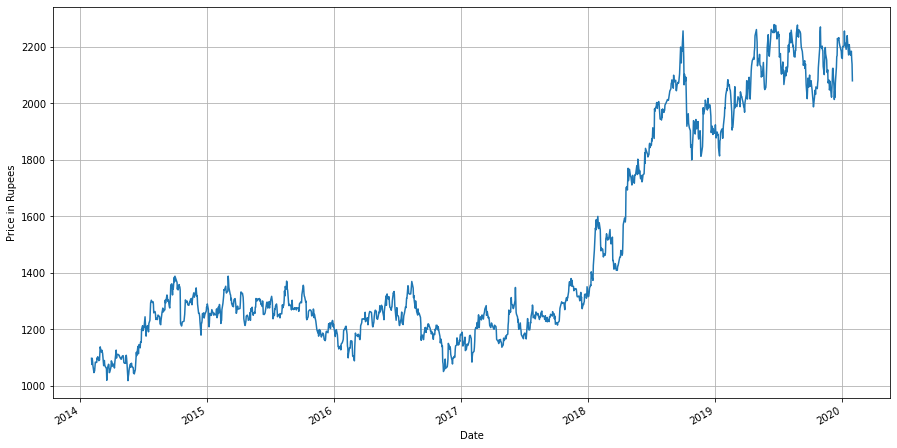

In [14]:
tcs['Close Price'].plot(figsize = (15,8))
plt.grid()
plt.ylabel('Price in Rupees')
plt.show()

In [15]:
# create 5 days simple moving average column
tcs['5_SMA'] = tcs['Close Price'].rolling(window = 5, min_periods = 1).mean()
# create 13 days simple moving average column
tcs['13_SMA'] = tcs['Close Price'].rolling(window = 13, min_periods = 1).mean()
# create 26 days simple moving average column
tcs['26_SMA'] = tcs['Close Price'].rolling(window = 26, min_periods = 1).mean()
# display first few rows
tcs.head()

,Close Price,5_SMA,13_SMA,26_SMA
Date,,,,
2014-02-03,1097.224976,1097.224976,1097.224976,1097.224976
2014-02-04,1075.675049,1086.450012,1086.450012,1086.450012
2014-02-05,1097.199951,1090.033325,1090.033325,1090.033325
2014-02-06,1087.625000,1089.431244,1089.431244,1089.431244
2014-02-07,1072.199951,1085.984985,1085.984985,1085.984985


In [18]:
tcs['Signal'] = 0.0
tcs['Signal'] = np.where(tcs['5_SMA'] > tcs['26_SMA'], 1.0, 0.0)


In [19]:
tcs['Position'] = tcs['Signal'].diff()
# display first few rows
tcs.head()

,Close Price,5_SMA,13_SMA,26_SMA,Signal,Position
Date,,,,,,
2014-02-03,1097.224976,1097.224976,1097.224976,1097.224976,0.0,NaN
2014-02-04,1075.675049,1086.450012,1086.450012,1086.450012,0.0,0.0
2014-02-05,1097.199951,1090.033325,1090.033325,1090.033325,0.0,0.0
2014-02-06,1087.625000,1089.431244,1089.431244,1089.431244,0.0,0.0
2014-02-07,1072.199951,1085.984985,1085.984985,1085.984985,0.0,0.0


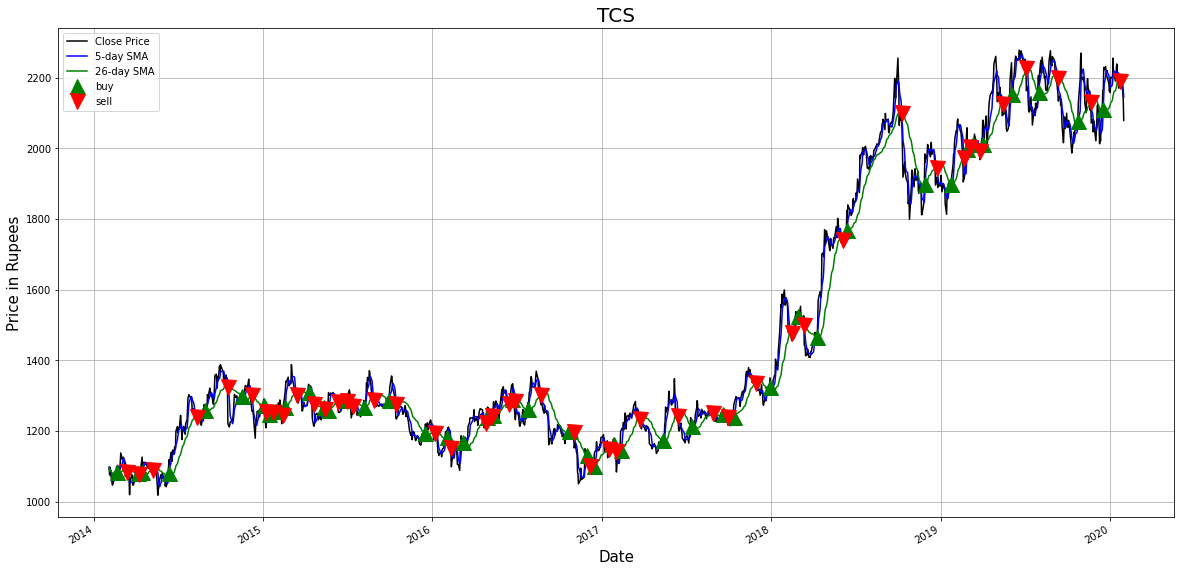

In [20]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
tcs['Close Price'].plot(color = 'k', label= 'Close Price') 
tcs['5_SMA'].plot(color = 'b',label = '5-day SMA') 
tcs['26_SMA'].plot(color = 'g', label = '26-day SMA')
# plot ‘buy’ signals
plt.plot(tcs[tcs['Position'] == 1].index, 
         tcs['5_SMA'][tcs['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(tcs[tcs['Position'] == -1].index, 
         tcs['5_SMA'][tcs['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('TCS', fontsize = 20)
plt.legend()
plt.grid()
plt.show()